In [670]:
import requests
import datetime
import time
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import json

In [234]:
###Se extraen datos de API Blockchain para obtener en el último año trasacciones por segundo
data_blockchain=requests.get("https://api.blockchain.info/charts/transactions-per-second?timespan=52weeks&rollingAverage=8hours&format=json")

In [220]:
print(data_blockchain)

<Response [200]>


In [676]:
data_blockchain1=data_blockchain.json()
f = open("data_blockchain1.json","w")
f.write(json)
f.close()

In [287]:
data_blockchain1.keys()

dict_keys(['status', 'name', 'unit', 'period', 'description', 'values'])

In [288]:
data_blockchain1["values"][0:20]

[{'x': 1557878400, 'y': 4.059374999999998},
 {'x': 1557899100, 'y': 3.484895833333332},
 {'x': 1557919800, 'y': 4.142708333333331},
 {'x': 1557940500, 'y': 4.8192708333333325},
 {'x': 1557961200, 'y': 4.657291666666664},
 {'x': 1557981900, 'y': 3.99427083333333},
 {'x': 1558002600, 'y': 4.324999999999998},
 {'x': 1558023300, 'y': 4.747916666666665},
 {'x': 1558044000, 'y': 4.564583333333331},
 {'x': 1558064700, 'y': 3.5140624999999988},
 {'x': 1558085400, 'y': 4.096354166666666},
 {'x': 1558106100, 'y': 4.84895833333333},
 {'x': 1558126800, 'y': 4.363020833333327},
 {'x': 1558147500, 'y': 3.1484374999999947},
 {'x': 1558168200, 'y': 3.2312499999999944},
 {'x': 1558188900, 'y': 3.67552083333333},
 {'x': 1558209600, 'y': 3.7145833333333305},
 {'x': 1558230300, 'y': 3.2833333333333306},
 {'x': 1558251000, 'y': 3.3749999999999982},
 {'x': 1558271700, 'y': 4.01927083333333}]

In [289]:
### API de Bitcoin nos arroja 1519 valores, comenzando un año atrás a partir de la extracción de datos
inicio=data_blockchain1["values"][0]["x"]
fin=data_blockchain1["values"][1518]["x"]
print("Valor inicio",inicio)
print("Valor fin",fin)

Valor inicio 1557878400
Valor fin 1589313600


In [290]:
data_blockchain1=pd.DataFrame(data_blockchain1["values"])

In [291]:
data_blockchain1.head()

,x,y
0,1557878400,4.059375
1,1557899100,3.484896
2,1557919800,4.142708
3,1557940500,4.819271
4,1557961200,4.657292


In [421]:
data_blockchain1.columns=["Date","Transacciones/segundo"]

In [293]:
####Convierte tiempo Unix en cadena de texto, excluyendo horas, minutos y segundos
def unixtime_txt(x):
    x=datetime.datetime.fromtimestamp(x)
    anio=str(x.year)
    mes=str(x.month)
    dia=str(x.day)
    if len(mes)<2:
        mes="0"+mes
    if len(dia)<2:
        dia="0"+dia
    x=str(anio+"-"+mes+"-"+dia)
    return x

In [294]:
for i in range(0,1519):
    data_blockchain1.iloc[i,0]=unixtime_txt(data_blockchain1.iloc[i,0])

In [295]:
data_blockchain1.head()

,Datetime,Transacciones/segundo
0,2019-05-14,4.059375
1,2019-05-15,3.484896
2,2019-05-15,4.142708
3,2019-05-15,4.819271
4,2019-05-15,4.657292


In [303]:
data_blockchain1=data_blockchain1.groupby("Datetime").mean().reset_index()

In [310]:
data_blockchain1.dtypes

Datetime                  object
Transacciones/segundo    float64
dtype: object

In [320]:
###Se desea hacer extracción Webscrapping de Yahoo, sin embargo ellos permiten descargar los datos en CSV por lo que se prefieren estos datos por practicidad
###sin embargo, para cumplir los requerimientos del proyecto más adelante se realiza webscrapping para demostrar que fue posible

###Se descubre que el link se compone por 3 parámetros: 1. Clave de pizarra, 2. Fecha inicial en Unix time, 3. Fecha final en Unix time
###esto para frecuencia diaria

###Claves de pizarra
###SPY para índice S&P500, 5EVIX para VIX
sp500="SPY"
VIX="5EVIX"

yahoo_data_sp500=requests.get("https://query1.finance.yahoo.com/v7/finance/download/"+sp500+"?period1="+str(inicio)+"&period2="+str(fin)+"&interval=1d&events=history")
yahoo_data_vix=requests.get("https://query1.finance.yahoo.com/v7/finance/download/%"+VIX+"?period1="+str(inicio)+"&period2="+str(fin)+"&interval=1d&events=history")

In [321]:
type(yahoo_data_sp500.content)

In [612]:
###Webscrapping Yahoo

yahoo_webs_sp500="https://finance.yahoo.com/quote/"+str(sp500)+"/history?period1=1557878400&period2=1589241600&interval=1d&filter=history&frequency=1d"
yahoo_webs_vix="https://finance.yahoo.com/quote/%"+str(VIX)+"/history?period1=1557878400&period2=1589328000&interval=1d&filter=history&frequency=1d"

html_sp500=requests.get(yahoo_webs_sp500).content
html_vix=requests.get(yahoo_webs_vix).content

In [613]:
soup_sp500=BeautifulSoup(html_sp500)
soup_vix=BeautifulSoup(html_vix)

In [639]:
web_vix=soup_vix.find_all("table",{"class":"W(100%) M(0)"})

In [640]:
web_vix=web_vix[0].find_all("tr")

In [659]:
for i in range(0,10):
    print(web_vix[i].text)

DateOpenHighLowClose*Adj Close**Volume
May 12, 202028.4733.0426.0033.0433.04-
May 11, 202028.4631.4626.9727.5727.57-
May 08, 202030.1430.3927.8927.9827.98-
May 07, 202032.1232.2830.3731.4431.44-
May 06, 202032.6935.6931.6834.1234.12-
May 05, 202034.8236.2231.9533.6133.61-
May 04, 202039.1340.3235.5335.9735.97-
May 01, 202038.1739.5736.5937.1937.19-
Apr 30, 202030.9935.9430.9334.1534.15-


In [681]:
tabla_vix=[["Date","Open","High","Low","Close","AdjClose"]]
for i in web_vix:
    x=[i.text[:12],i.text[12:17],i.text[17:22],i.text[22:27],i.text[27:32],i.text[32:37]]
    tabla_vix.append(x)

In [682]:
tabla_vix.pop(1)

['DateOpenHigh', 'LowCl', 'ose*A', 'dj Cl', 'ose**', 'Volum']

In [684]:
tabla_vix.pop(101)

['*Close price', ' adju', 'sted ', 'for s', 'plits', '.**Ad']

In [685]:
tabla_vix[0:10]

[['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose'],
 ['May 12, 2020', '28.47', '33.04', '26.00', '33.04', '33.04'],
 ['May 11, 2020', '28.46', '31.46', '26.97', '27.57', '27.57'],
 ['May 08, 2020', '30.14', '30.39', '27.89', '27.98', '27.98'],
 ['May 07, 2020', '32.12', '32.28', '30.37', '31.44', '31.44'],
 ['May 06, 2020', '32.69', '35.69', '31.68', '34.12', '34.12'],
 ['May 05, 2020', '34.82', '36.22', '31.95', '33.61', '33.61'],
 ['May 04, 2020', '39.13', '40.32', '35.53', '35.97', '35.97'],
 ['May 01, 2020', '38.17', '39.57', '36.59', '37.19', '37.19'],
 ['Apr 30, 2020', '30.99', '35.94', '30.93', '34.15', '34.15']]

In [686]:
df_web_vix=pd.DataFrame(tabla_vix)

In [687]:
df_web_vix.to_csv("vix_webscrapping.csv",index=False)

In [323]:
###Convierte bytes a data frame de pandas,

def bytes_dataframe(x):
    x=str(x.content,'utf-8')
    x=StringIO(x) 
    x=pd.read_csv(x)
    return x

In [326]:
df_sp500=bytes_dataframe(yahoo_data_sp500)
df_vix=bytes_dataframe(yahoo_data_vix)

In [390]:
df_sp500["Date"]

0      2019-05-15
1      2019-05-16
2      2019-05-17
3      2019-05-20
4      2019-05-21
          ...    
246    2020-05-06
247    2020-05-07
248    2020-05-08
249    2020-05-11
250    2020-05-12
Name: Date, Length: 251, dtype: object

In [395]:
###This data was produced from the CoinDesk Bitcoin Price Index. BPI value data returned as USD.###
###Para esta API ingresamos dos parametros para obtener mismo periodo de datos que API Blockchain
inicio_coindesk=unixtime_txt(inicio)
fin_coindesk=unixtime_txt(fin)

data_coindesk=requests.get("https://api.coindesk.com/v1/bpi/historical/close.json?start="+inicio_coindesk+"&end="+fin_coindesk)
print(data_coindesk)

<Response [200]>


In [408]:
data_coindesk1=data_coindesk.json()

In [409]:
data_coindesk1.keys()

dict_keys(['bpi', 'disclaimer', 'time'])

In [416]:
data_coindesk2=[]

for i in df_yahoo_data["Date"]:
    try:
        x=[i,data_coindesk1["bpi"][i]]
        data_coindesk2.append(x)
    except:
        pass

In [417]:
data_coindesk2=pd.DataFrame(data_coindesk2,columns=["Date","BTC-USD"])

In [419]:
data_coindesk2.head()

,Date,BTC-USD
0,2019-05-14,7978.0100
1,2019-05-15,8180.4250
2,2019-05-16,7875.1633
3,2019-05-17,7376.8533
4,2019-05-20,7995.9650


In [422]:
data_btc=data_blockchain1.merge(data_coindesk2,on="Date")

In [437]:
data_btc.isnull().count()

Date                     248
Transacciones/segundo    248
BTC-USD                  248
dtype: int64

In [688]:
data_btc.head()

,Date,Transacciones/segundo,BTC-USD
0,2019-05-14,4.059375,7978.0100
1,2019-05-15,4.219687,8180.4250
2,2019-05-16,4.287891,7875.1633
3,2019-05-17,4.114193,7376.8533
4,2019-05-20,4.347917,7995.9650


In [689]:
data_btc.to_csv("blockchain-coindesk.csv",index=False)

In [442]:
data_btc.isnull().sum()

Date                     0
Transacciones/segundo    0
BTC-USD                  0
dtype: int64

In [501]:
data_btc_sp500=data_btc.merge(df_sp500,on="Date")

In [463]:
data_btc_sp500.isnull().sum()

Date                     0
Transacciones/segundo    0
BTC-USD                  0
Open                     0
High                     0
Low                      0
Close                    0
Adj Close                0
Volume                   0
dtype: int64

In [500]:
data_btc_vix=data_btc.merge(df_vix,on="Date")

In [465]:
data_btc_vix.isnull().sum()

Date                     0
Transacciones/segundo    0
BTC-USD                  0
Open                     0
High                     0
Low                      0
Close                    0
Adj Close                0
Volume                   0
dtype: int64

In [466]:
data_btc_vix.describe()

,Transacciones/segundo,BTC-USD,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.0
mean,3.672005,8762.293946,21.911741,23.474413,20.419028,21.775223,21.775223,0.0
std,0.329218,1510.585014,14.728238,16.396581,13.056545,14.699265,14.699265,0.0
min,2.495833,4914.085000,11.550000,11.790000,11.420000,11.540000,11.540000,0.0
25%,3.482096,7628.731650,13.630000,14.345000,12.960000,13.535000,13.535000,0.0
50%,3.663021,8671.508300,15.680000,16.440001,15.010000,15.560000,15.560000,0.0
75%,3.841862,9826.577500,20.035000,21.295000,18.450000,19.575000,19.575000,0.0
max,4.870964,12907.135000,82.690002,85.470001,70.370003,82.690002,82.690002,0.0


In [504]:
###El índice VIX es un índicador de volatilidad utilizado en el mercado de valores, por su naturaleza no cuenta con volumen de transacciones
###Por este motivo eliminaremos esta columna, tambien eliminaremos la columna de transacciones por segundo, debido a que ya no la utilizaremos para obtener
###La correlación entre el volumen de bitcoins con volumen con VIX pues no es procedente

data_btc_vix=data_btc_vix.drop(columns=["Volume","Transacciones/segundo"])

In [505]:
data_btc_vix.head()

,Date,BTC-USD,Open,High,Low,Close,Adj Close
0,2019-05-15,8180.4250,17.570000,19.150000,16.41,16.440001,16.440001
1,2019-05-16,7875.1633,16.690001,17.129999,15.16,15.290000,15.290000
2,2019-05-17,7376.8533,15.890000,16.809999,14.86,15.960000,15.960000
3,2019-05-20,7995.9650,15.880000,17.629999,15.46,16.309999,16.309999
4,2019-05-21,7945.0450,15.860000,16.219999,14.79,14.950000,14.950000


In [506]:
data_btc_sp500.head()

,Date,Transacciones/segundo,BTC-USD,Open,High,Low,Close,Adj Close,Volume
0,2019-05-15,4.219687,8180.4250,281.589996,285.769989,281.359985,285.059998,279.352051,73956400
1,2019-05-16,4.287891,7875.1633,285.839996,289.209991,285.760010,287.700012,281.939240,76749600
2,2019-05-17,4.114193,7376.8533,285.140015,288.600006,285.119995,285.839996,280.116455,100353000
3,2019-05-20,4.347917,7995.9650,284.059998,285.959991,283.119995,283.950012,278.264313,62877600
4,2019-05-21,4.126146,7945.0450,285.829987,286.929993,285.549988,286.510010,280.773041,46847100


In [507]:
###Borraremos las columnas Open, High, Low, Adj Close, pues de momento no las utilizaremos para nuestro análisis, y renombraremos las columnas
data_btc_vix=data_btc_vix.drop(columns=["Open","High","Low","Adj Close"])
data_btc_sp500=data_btc_sp500.drop(columns=["Open","High","Low","Adj Close"])
data_btc_vix.columns=["Date","BTC-USD","VIX"]
data_btc_sp500.columns=["Date","Volumen BTC","BTC-USD","SP500-USD","Volumen SP500"]

In [509]:
data_btc_sp500.head()

,Date,Volumen BTC,BTC-USD,SP500-USD,Volumen SP500
0,2019-05-15,4.219687,8180.4250,285.059998,73956400
1,2019-05-16,4.287891,7875.1633,287.700012,76749600
2,2019-05-17,4.114193,7376.8533,285.839996,100353000
3,2019-05-20,4.347917,7995.9650,283.950012,62877600
4,2019-05-21,4.126146,7945.0450,286.510010,46847100


In [511]:
data_btc_vix.head()

,Date,BTC-USD,VIX
0,2019-05-15,8180.4250,16.440001
1,2019-05-16,7875.1633,15.290000
2,2019-05-17,7376.8533,15.960000
3,2019-05-20,7995.9650,16.309999
4,2019-05-21,7945.0450,14.950000


In [515]:
###Hemos decidido juntar la tabla de VIX con SP500 por fehca, para encontrar relaciones con nuestros 3 activos e indicadores (VIX,BTC,SP500)

data_total=data_btc_sp500.merge(data_btc_vix[["Date","VIX"]],on="Date")
data_total.head()

,Date,Volumen BTC,BTC-USD,SP500-USD,Volumen SP500,VIX
0,2019-05-15,4.219687,8180.4250,285.059998,73956400,16.440001
1,2019-05-16,4.287891,7875.1633,287.700012,76749600,15.290000
2,2019-05-17,4.114193,7376.8533,285.839996,100353000,15.960000
3,2019-05-20,4.347917,7995.9650,283.950012,62877600,16.309999
4,2019-05-21,4.126146,7945.0450,286.510010,46847100,14.950000


In [526]:
###Convertiremos la columna Date de str a un timestamp para que sea más útil como una serie de tiempo
data_total["Date"]=pd.to_datetime(data_total["Date"])

In [529]:
type(data_total["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [533]:
###Convertimos columna Date en index
data_total=data_total.set_index("Date")

In [690]:
data_total.head()

,Volumen BTC,BTC-USD,SP500-USD,Volumen SP500,VIX
Date,,,,,
2019-05-15,4.219687,8180.4250,285.059998,73956400,16.440001
2019-05-16,4.287891,7875.1633,287.700012,76749600,15.290000
2019-05-17,4.114193,7376.8533,285.839996,100353000,15.960000
2019-05-20,4.347917,7995.9650,283.950012,62877600,16.309999
2019-05-21,4.126146,7945.0450,286.510010,46847100,14.950000


In [691]:
data_total.to_csv("data_total.csv",index=True)

In [536]:
data_total["BTC-USD"].corr(data_total["VIX"])

-0.500923225463283

In [697]:
data_total["Volumen BTC"][-30:].corr(data_total["Volumen SP500"][-30:])

-0.7626476690486458

In [698]:
data_total["Volumen BTC"].corr(data_total["Volumen SP500"])

-0.277132321951885

In [538]:
data_total["BTC-USD"].corr(data_total["SP500-USD"])

0.28044950906355404

In [539]:
data_total["VIX"].corr(data_total["SP500-USD"])

-0.7407100762432254

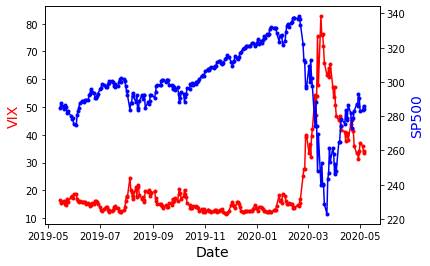

In [693]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(data_total.index, data_total["VIX"], color="red", marker=".")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("VIX",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_total.index, data_total["SP500-USD"],color="blue",marker=".")
ax2.set_ylabel("SP500",color="blue",fontsize=14)
plt.show()
fig.savefig('VIX-SP500.png',
            format='png',
            dpi=500,
            bbox_inches='tight')

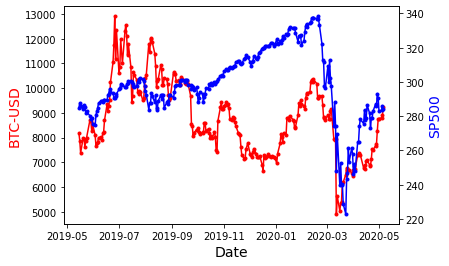

In [694]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(data_total.index, data_total["BTC-USD"], color="red", marker=".")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("BTC-USD",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_total.index, data_total["SP500-USD"],color="blue",marker=".")
ax2.set_ylabel("SP500",color="blue",fontsize=14)
plt.show()
fig.savefig('BTC-SP500.png',
            format='png',
            dpi=500,
            bbox_inches='tight')

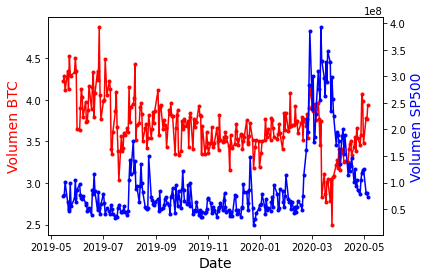

In [695]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(data_total.index, data_total["Volumen BTC"], color="red", marker=".")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Volumen BTC",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_total.index, data_total["Volumen SP500"],color="blue",marker=".")
ax2.set_ylabel("Volumen SP500",color="blue",fontsize=14)
plt.show()
fig.savefig('Volumen BTC-SP500.png',
            format='png',
            dpi=500,
            bbox_inches='tight')

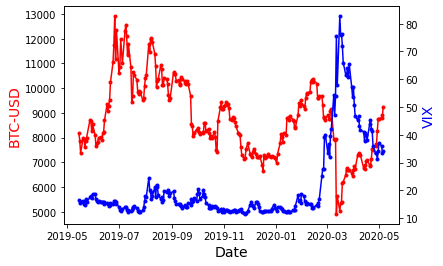

In [696]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(data_total.index, data_total["BTC-USD"], color="red", marker=".")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("BTC-USD",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_total.index, data_total["VIX"],color="blue",marker=".")
ax2.set_ylabel("VIX",color="blue",fontsize=14)
plt.show()
fig.savefig('Volumen BTCUSD-VIX.png',
            format='png',
            dpi=500,
            bbox_inches='tight')